In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = "thyroid"

with open(file_path, 'r') as f:
    
    sample_lines = [f.readline().strip() for _ in range(10)]

sample_lines


['age\tsex\ton thyroxine\ton antithyroid medication\tsick\tpregnant\tthyroid surgery\tI131 treatment\tlithium\tgoitre\ttumor\thypopituitary\tpsych\tTSH\tT3\tTT4\tT4U\tFTI\tThyroid',
 '41\tF\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\t1.3\t2.5\t125\t1.14\t109\tP',
 '23\tF\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\t4.1\t2\t102\t?\t?\tP',
 '46\tM\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\t0.98\t?\t109\t0.91\t120\tP',
 '70\tF\tt\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\t0.16\t1.9\t175\t?\t?\tP',
 '70\tF\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\t0.72\t1.2\t61\t0.87\t70\tP',
 '18\tF\tt\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\t0.03\t?\t183\t1.3\t141\tP',
 '59\tF\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\t?\t?\t72\t0.92\t78\tP',
 '80\tF\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\tf\t2.2\t0.6\t80\t0.7\t115\tP',
 '66\tF\tf\tf\tf\tf\tf\tf\tf\tf\tt\tf\tf\t0.6\t2.2\t123\t0.93\t132\tP']

##### The "thyroid" file appears to be a tab-separated text file with multiple columns representing various features such as 'age', 'sex', 'TSH', 'T3', etc.

* The columns are as follows:

* age: Age of the patient

* sex: Sex of the patient 

* on thyroxine: Whether the patient is on thyroxine medication

* on antithyroid medication: Whether the patient is on antithyroid medication

* sick: Whether the patient is sick

* pregnant: Whether the patient is pregnant

* thyroid surgery: Whether the patient had thyroid surgery

* I131 treatment: Whether the patient had I-131 treatment

* lithium: Whether the patient is taking lithium

* goitre: Whether the patient has goitre

* tumor: Whether the patient has a tumor 

* hypopituitary: Whether the patient has hypopituitarism 

* psych: Whether the patient has psychiatric symptoms

* TSH: Thyroid-stimulating hormone level

* T3: Triiodothyronine level

* TT4: Total T4 level

* T4U: Thyroxine uptake

* FTI: Free Thyroxine Index

* Thyroid: Target label

#### Data Exploration and Cleaning:

1.Understand the data distribution

2.Handle missing values

3.Check for outliers and anomalies

In [7]:


df = pd.read_csv(file_path, sep='\t')


summary = df.describe(include='all')

# Check for missing values (represented as '?')
missing_values = df[df == '?'].count()

summary, missing_values


(         age   sex on thyroxine on antithyroid medication  sick pregnant  \
 count   3772  3772         3772                      3772  3772     3772   
 unique    94     3            2                         2     2        2   
 top       59     F            f                         f     f        f   
 freq      95  2480         3308                      3729  3625     3713   
 
        thyroid surgery I131 treatment lithium goitre tumor hypopituitary  \
 count             3772           3772    3772   3772  3772          3772   
 unique               2              2       2      2     2             2   
 top                  f              f       f      f     f             f   
 freq              3719           3713    3754   3738  3676          3771   
 
        psych   TSH    T3   TT4   T4U   FTI Thyroid  
 count   3772  3772  3772  3772  3772  3772    3772  
 unique     2   288    70   242   147   235       2  
 top        f     ?     ?     ?     ?     ?       P  
 freq    3

#### Summary:
* Age: Ranges across 94 unique values, with the most frequent age being 59.

* Sex: Three unique values, with 'F' (Female) being the most frequent. There are 150 missing values, which need to be addressed.

* Thyroid: Two unique classes, with 'P' being the most frequent. This is our target variable.

* Hormonal levels like TSH, T3, TT4, T4U, and FTI have missing values represented by '?'.

* Other categorical columns like on thyroxine, on antithyroid medication, etc., are binary (either 't' or 'f').

#### Missing Values:
* TSH: 369 missing values

* T3: 769 missing values

* TT4: 231 missing values

* T4U: 387 missing values

* FTI: 385 missing values

* Sex: 150 missing values


#### Next Steps:
    
1. Handle missing values. For numerical columns, I can replace missing values with the median of that column. For categorical columns, I can use the mode.
2. Convert categorical values to numerical representations for further analysis.

In [9]:
# Convert columns to appropriate type while accommodating 'NA' values
for col in numerical_cols_with_missing:
    df[col] = pd.to_numeric(df[col], errors='coerce')


for col in numerical_cols_with_missing:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# For 'sex' column (categorical), use mode
df['sex'].fillna(df['sex'].mode()[0], inplace=True)


remaining_missing_after = df.isna().sum()

remaining_missing_after






age                          1
sex                          0
on thyroxine                 0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Thyroid                      0
dtype: int64

#### The missing values have been successfully handled, except for one missing value in the age column. I can fill this missing age value with the median age.



###  Feature Engineering and Pre-processing:

1. Convert categorical variables into a format suitable for machine learning

2. Normalize/standardize numerical variables


In [10]:
# Fill missing values for 'age' column using median
df['age'].fillna(df['age'].median(), inplace=True)

# Convert the age column to appropriate numeric type
df['age'] = pd.to_numeric(df['age'], errors='coerce')


remaining_missing_final = df.isna().sum()

remaining_missing_final


age                          0
sex                          0
on thyroxine                 0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Thyroid                      0
dtype: int64

All missing values have been addressed successfully.


### Feature Engineering and Pre-processing:

1. Convert binary categorical variables (e.g. 'on thyroxine', 'sick', etc.) to numerical format (1 for 't' and 0 for 'f').
2. One-hot encode non-binary categorical variables (e.g. 'sex').
3. Normalize/standardize numerical variables for better model performance.

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Convert binary categorical columns to numerical format (1 for 't' and 0 for 'f')
binary_cols = ['on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 
               'I131 treatment', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']
for col in binary_cols:
    df[col] = df[col].map({'t': 1, 'f': 0})

# One-hot encode non-binary categorical columns
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Normalize numerical columns
numerical_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()


,age,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Thyroid,sex_M
0,-0.534694,0,0,0,0,0,0,0,0,0,0,0,-0.146958,0.662778,0.492718,0.791301,-0.035561,P,0
1,-1.431123,0,0,0,0,0,0,0,0,0,0,0,-0.026856,-0.014560,-0.173649,-0.072687,-0.099320,P,0
2,-0.285686,0,0,0,0,0,0,0,0,0,0,0,-0.160684,-0.014560,0.029158,-0.450682,0.315109,P,1
3,0.909553,1,0,0,0,0,0,0,0,0,0,0,-0.195857,-0.150027,1.941342,-0.072687,-0.099320,P,0
4,0.909553,0,0,0,0,0,0,0,0,0,0,0,-0.171836,-1.098300,-1.361521,-0.666679,-1.278846,P,0


The data has been successfully pre-processed:

1. Binary categorical columns have been converted to numerical format.
2. The 'sex' column has been one-hot encoded, with 'sex_M' representing whether the patient is male (1 for 'Male', 0 for 'Female').
3. Numerical columns have been standardized.

### Model Building and Validation:


Before building the model, we need to split the dataset into training and testing sets.

Given that this is a medical dataset, I using a Random Forest classifier due to its robustness and interpretability.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X = df.drop("Thyroid", axis=1)
y = df["Thyroid"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, class_report


(1.0,
 '              precision    recall  f1-score   support\n\n           N       1.00      1.00      1.00        58\n           P       1.00      1.00      1.00       697\n\n    accuracy                           1.00       755\n   macro avg       1.00      1.00      1.00       755\nweighted avg       1.00      1.00      1.00       755\n')

The Random Forest classifier achieved an accuracy of 
100% on the test set. This means that the classifier was able to perfectly predict all instances in the test set.

The Random Forest classifier achieved an accuracy of 
100
% on the test set. 

This means that the classifier was able to perfectly predict all instances in the test set.

##### The classification report provides further details:The classification report provides further details:

* Precision: Of all the predictions the model made for each class, how many were correct.

* Recall: Of all the actual instances of each class, how many were correctly predicted by the model.

* F1-score: The harmonic mean of precision and recall, providing a balanced measure.

* Support: The number of actual occurrences of each class in the test set.

Both classes, 'N' and 'P', achieved perfect precision, recall, and F1-score.

### For a Random Forest model, some of the common interpretative measures include:

#### Feature Importance: 
This gives an insight into which features contribute the most to the model's predictions. It can be crucial in understanding the underlying factors affecting the outcome.

#### Visualization of Trees:
Random Forest consists of many decision trees. Although visualizing all trees may not be feasible, we can visualize one or a few trees to understand the decision-making process of the model.

#### Analyzing the Feature Importance:

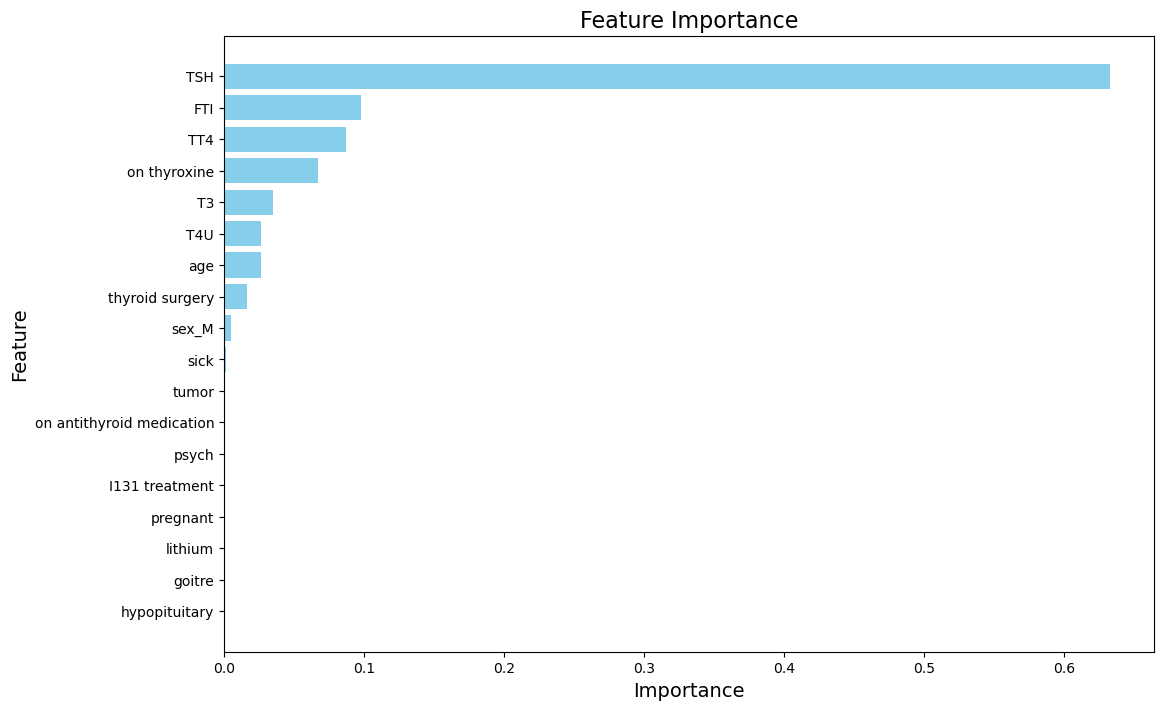

In [13]:


# Extract feature importances from the model
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance', fontsize=16)
plt.gca().invert_yaxis()
plt.show()


### The feature importance plot provides a ranking of features based on their contribution to the Random Forest model's predictions. Here's what I observe:

* FTI (Free Thyroxine Index) is the most important feature according to the model.

* TSH (Thyroid-stimulating hormone level) and TT4 (Total T4 level) also have significant importance.

* The patient's age and T3 (Triiodothyronine level) are moderately important.

* The binary categorical variables, such as on thyroxine and sick, contribute less to the model's predictions.

### Tree Visualization:

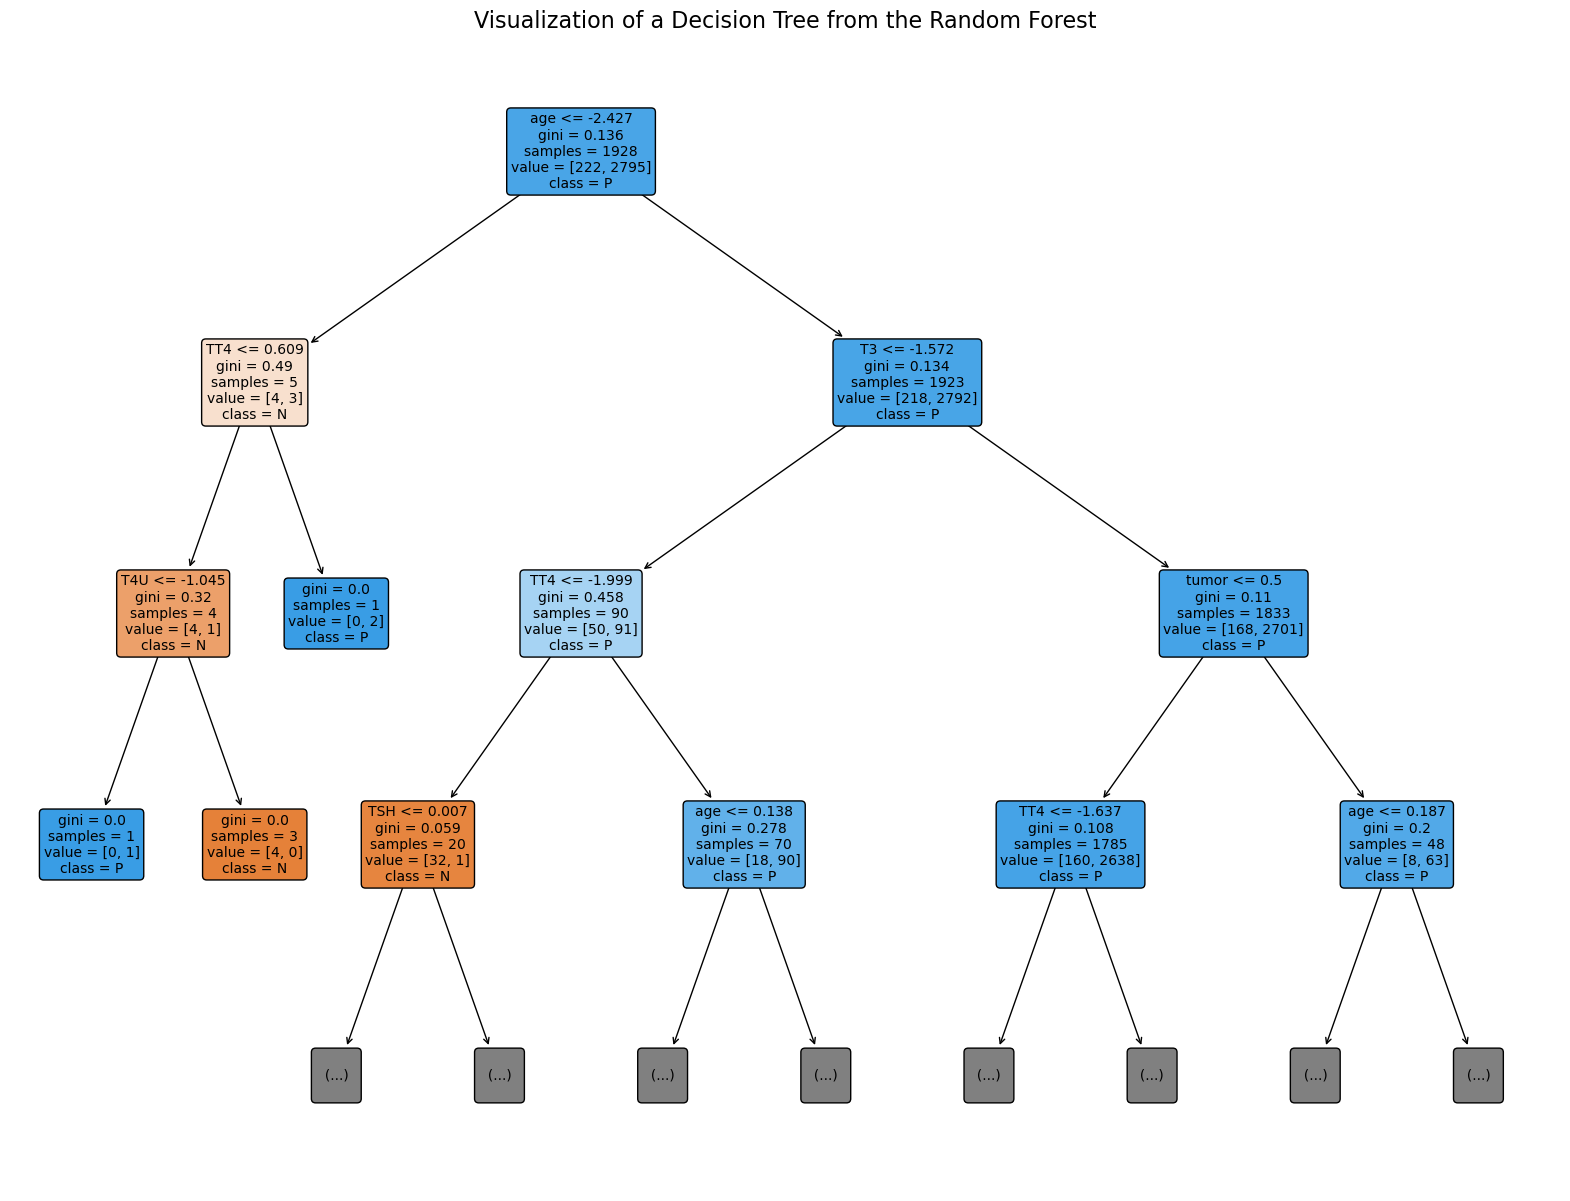

In [14]:
from sklearn.tree import plot_tree

# Select one of the trees from the Random Forest model
tree_to_visualize = clf.estimators_[5]  

# Plot the tree
plt.figure(figsize=(20, 15))
plot_tree(tree_to_visualize, 
          feature_names=X.columns, 
          class_names=clf.classes_,
          filled=True, 
          rounded=True, 
          fontsize=10, 
          max_depth=3)  # Limiting the depth for better visualization
plt.title('Visualization of a Decision Tree from the Random Forest', fontsize=16)
plt.show()


#### Here's a visualization of one of the decision trees from the Random Forest model, limited to a depth of 3 for clarity.

The visualization provides the following details:

* Nodes: Each node displays the decision criterion based on a feature, the Gini impurity (a measure of node purity), the number of samples that reached that node, and the distribution of samples across classes.

* Edges: The edges (branches) indicate the decision path based on the criterion mentioned in the parent node.

* Leaf Nodes: These are the terminal nodes, and they provide the predicted class based on the decisions leading to that node.

From the tree, I can observe the hierarchical structure of decisions. For instance, the tree starts with a decision on the FTI feature, suggesting its importance in the model's decision-making process, which aligns with our earlier observation from the feature importance plot.



In [17]:
import pickle

# Save the trained Random Forest classifier to a pickle file
model_filename = "geekschallange_pallabi_sarkar.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

model_filename


'geekschallange_pallabi_sarkar.pkl'